# Introduction to data science

## Module 1 - Challenge

### Abstract

Pretend you are a data scientist on a healthcare team looking to identify patterns in patient medical data. Your team is
working on a project to identify health risks in patients with specific health conditions such as diabetes, hypertension or disease cardiovascular.

### Objective

The goal is to identify patterns in the data that may indicate a patient's risk of developing cardiovascular problems.

His team decided to use the k-means clustering method to group the patients into three distinct groups based on the information provided.

### Libraries imports

In [548]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
import sklearn

### Dataset import

In [549]:
medical_data = pd.read_csv("./raw_data/medical_data.csv", sep=";")
profile_data = pd.read_excel("./raw_data/profile_data.xlsx")
states_data = pd.read_csv("./raw_data/states_data.csv", sep=";")

### Exploratory data analysis

#### Medical data

In [550]:
# Generic data
medical_data.tail()

,ID,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco
995,996,21.8,129,75,Normal,196.8,221.2,117.4,Não
996,997,21.8,137,73,Normal,171.4,194.3,125.2,Sim
997,998,37.1,94,70,Alto,157.6,188.2,120.7,Sim
998,999,30.4,141,77,Alto,112.2,147.5,54.6,Sim
999,1000,39.4,118,61,Normal,131.7,152.9,156.2,Sim


In [551]:
# Generating statistical data
medical_data.describe()

,ID,IMC,Pressão Sistólica,Pressão Diastólica,peso,Colesterol Total,Triglicerídeos
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,989.000000,1000.000000
mean,500.500000,28.909900,130.038000,80.299000,150.796100,193.219717,147.386100
std,288.819436,6.431569,23.175151,11.966737,26.447694,32.007185,36.455399
min,1.000000,18.000000,90.000000,60.000000,67.500000,96.400000,49.200000
25%,250.750000,23.300000,111.000000,70.000000,133.975000,173.000000,122.675000
50%,500.500000,28.500000,129.000000,81.000000,150.750000,194.300000,147.500000
75%,750.250000,34.900000,150.000000,90.000000,169.425000,214.300000,170.350000
max,1000.000000,40.000000,170.000000,100.000000,234.400000,293.200000,259.300000


In [552]:
# Checking for missing values
medical_data.isna().sum()

ID                                0
IMC                               0
Pressão Sistólica                 0
Pressão Diastólica                0
Nível de Açúcar                   0
peso                              0
Colesterol Total                 11
Triglicerídeos                    0
Histórico Familiar - Cardiaco     0
dtype: int64

In [553]:
# Checking the data format
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             1000 non-null   int64  
 1   IMC                            1000 non-null   float64
 2   Pressão Sistólica              1000 non-null   int64  
 3   Pressão Diastólica             1000 non-null   int64  
 4   Nível de Açúcar                1000 non-null   object 
 5   peso                           1000 non-null   float64
 6   Colesterol Total               989 non-null    float64
 7   Triglicerídeos                 1000 non-null   float64
 8   Histórico Familiar - Cardiaco  1000 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 70.4+ KB


In [554]:
# Get the rows and columns count
medical_data.shape

(1000, 9)

#### Profile data

In [555]:
# Generic data
profile_data.tail()

,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf
995,996,F,NaN,Moderado,Sedentário,23
996,997,M,24.0,Baixo,Ativo,23
997,998,M,78.0,Baixo,Atividade Moderada,41
998,999,M,57.0,Baixo,Atividade Moderada,51
999,1000,M,27.0,Baixo,Ativo,12


In [556]:
# Generating statistical data
profile_data.describe()

,ID,Idade,cod_uf
count,1000.000000,990.000000,1000.000000
mean,500.500000,48.887879,29.289000
std,288.819436,17.940937,13.041993
min,1.000000,18.000000,11.000000
25%,250.750000,33.000000,17.000000
50%,500.500000,49.000000,27.000000
75%,750.250000,64.000000,41.000000
max,1000.000000,80.000000,53.000000


In [557]:
# Checking for missing values
profile_data.isna().sum()

ID                    0
Gênero                0
Idade                10
Consumo de Álcool     0
Atividade Física      0
cod_uf                0
dtype: int64

In [558]:
# Checking the data format
profile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1000 non-null   int64  
 1   Gênero             1000 non-null   object 
 2   Idade              990 non-null    float64
 3   Consumo de Álcool  1000 non-null   object 
 4   Atividade Física   1000 non-null   object 
 5   cod_uf             1000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [559]:
# Get the rows and columns count
profile_data.shape

(1000, 6)

#### States data

In [560]:
# Generic data
states_data.tail()

,codigo_uf,uf,nome,latitude,longitude,regiao,pais
22,43,RS,Rio Grande do Sul,-30.17,-53.50,Sul,Brasil
23,50,MS,Mato Grosso do Sul,-20.51,-54.54,Centro-Oeste,Brasil
24,51,MT,Mato Grosso,-12.64,-55.42,Centro-Oeste,Brasil
25,52,GO,Goiás,-15.98,-49.86,Centro-Oeste,Brasil
26,53,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil


In [561]:
# Generating statistical data
states_data.describe()

,codigo_uf,latitude,longitude
count,27.000000,27.000000,27.000000
mean,29.111111,-12.381111,-48.410370
std,13.024631,8.476122,9.291479
min,11.000000,-30.170000,-70.550000
25%,19.000000,-18.645000,-52.990000
50%,27.000000,-10.570000,-48.260000
75%,38.000000,-6.205000,-41.025000
max,53.000000,1.990000,-36.590000


In [562]:
# Checking for missing values
states_data.isna().sum()

codigo_uf    0
uf           0
nome         0
latitude     0
longitude    0
regiao       0
pais         0
dtype: int64

In [563]:
# Checking the data format
states_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   codigo_uf  27 non-null     int64  
 1   uf         27 non-null     object 
 2   nome       27 non-null     object 
 3   latitude   27 non-null     float64
 4   longitude  27 non-null     float64
 5   regiao     27 non-null     object 
 6   pais       27 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.6+ KB


In [564]:
# Get the rows and columns count
states_data.shape

(27, 7)

### Treatments

**Missing values**

For profile data, use the data exclusion strategy.

For medical data, use:
- Mean rounded to 2 decimal places for numeric type variables;
- Mode for categorical variables.

For state data:
- Mode for categorical variables.
- Exclusion for numeric variables.

In [565]:
# Remove missing values
profile_data.dropna(inplace=True)
profile_data.isna().sum()

ID                   0
Gênero               0
Idade                0
Consumo de Álcool    0
Atividade Física     0
cod_uf               0
dtype: int64

In [566]:
# Find the field mean
colesterol_mean = round(medical_data["Colesterol Total"].mean(), 2)
# Fill missing values
medical_data["Colesterol Total"].fillna(colesterol_mean, inplace=True)
medical_data.isna().sum()

ID                               0
IMC                              0
Pressão Sistólica                0
Pressão Diastólica               0
Nível de Açúcar                  0
peso                             0
Colesterol Total                 0
Triglicerídeos                   0
Histórico Familiar - Cardiaco    0
dtype: int64

In [567]:
states_data.isna().sum()

codigo_uf    0
uf           0
nome         0
latitude     0
longitude    0
regiao       0
pais         0
dtype: int64

In [568]:
patients = pd.merge(medical_data, profile_data, on="ID")

states_data.rename(columns={'codigo_uf': 'cod_uf'}, inplace=True)
patients = pd.merge(patients, states_data, on="cod_uf").sort_values(["ID"])
patients

,ID,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf,uf,nome,latitude,longitude,regiao,pais
0,1,31.7,139,70,Normal,162.1,262.8,152.6,Sim,M,74.0,Moderado,Atividade Moderada,31,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil
45,2,28.1,93,66,Normal,193.4,199.2,152.4,Sim,F,34.0,Baixo,Atividade Moderada,35,SP,São Paulo,-22.19,-48.79,Sudeste,Brasil
80,3,26.1,109,86,Normal,162.2,223.4,190.1,Não,M,18.0,Moderado,Atividade Moderada,29,BA,Bahia,-13.29,-41.71,Nordeste,Brasil
109,4,31.6,159,87,Normal,155.4,189.7,130.2,Não,M,72.0,Baixo,Sedentário,15,PA,Pará,-3.79,-52.48,Norte,Brasil
144,5,37.2,99,63,Normal,161.5,218.3,146.0,Não,F,63.0,Baixo,Atividade Moderada,41,PR,Paraná,-24.89,-51.55,Sul,Brasil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,995,32.7,148,87,Normal,154.2,203.7,152.9,Não,F,18.0,Alto,Sedentário,31,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil
366,997,21.8,137,73,Normal,171.4,194.3,125.2,Sim,M,24.0,Baixo,Ativo,23,CE,Ceará,-5.20,-39.53,Nordeste,Brasil
184,998,37.1,94,70,Alto,157.6,188.2,120.7,Sim,M,78.0,Baixo,Atividade Moderada,41,PR,Paraná,-24.89,-51.55,Sul,Brasil
407,999,30.4,141,77,Alto,112.2,147.5,54.6,Sim,M,57.0,Baixo,Atividade Moderada,51,MT,Mato Grosso,-12.64,-55.42,Centro-Oeste,Brasil


### Data correlation analysis
- Positive correlation: Both variables increase or decrease together, that is, they have a direct relationship.
- Negative correlation: Both variables increase or decrease in opposite directions, that is, they have an indirect relationship.

In [569]:
patients.corr(numeric_only=True)

,ID,IMC,Pressão Sistólica,Pressão Diastólica,peso,Colesterol Total,Triglicerídeos,Idade,cod_uf,latitude,longitude
ID,1.000000,-0.011964,-0.003694,-0.058561,-0.036580,-0.020193,-0.012826,-0.016753,-0.001991,-0.017101,-0.024398
IMC,-0.011964,1.000000,-0.040235,-0.019576,0.007907,0.022001,-0.036660,-0.022759,-0.015139,0.007445,-0.000732
Pressão Sistólica,-0.003694,-0.040235,1.000000,-0.008359,0.014242,0.032770,0.038577,0.000210,-0.013038,0.049698,-0.002143
Pressão Diastólica,-0.058561,-0.019576,-0.008359,1.000000,0.036182,0.053514,-0.000404,0.000155,-0.032041,-0.006943,0.026121
peso,-0.036580,0.007907,0.014242,0.036182,1.000000,0.612699,0.341051,0.022034,0.006299,0.034552,0.053051
Colesterol Total,-0.020193,0.022001,0.032770,0.053514,0.612699,1.000000,0.567596,0.041467,0.012148,0.005731,0.073560
Triglicerídeos,-0.012826,-0.036660,0.038577,-0.000404,0.341051,0.567596,1.000000,0.018501,0.033137,-0.038338,0.075262
Idade,-0.016753,-0.022759,0.000210,0.000155,0.022034,0.041467,0.018501,1.000000,0.004744,-0.013783,0.026463
cod_uf,-0.001991,-0.015139,-0.013038,-0.032041,0.006299,0.012148,0.033137,0.004744,1.000000,-0.710645,0.183073
latitude,-0.017101,0.007445,0.049698,-0.006943,0.034552,0.005731,-0.038338,-0.013783,-0.710645,1.000000,-0.054112


### Find the number of clusters

In [570]:
# Set the independent fields
X = patients[["peso", "Triglicerídeos"]].values

In [571]:
# Find the WCSS
wcss = []
clusters_range = range(1, 11)
for i in clusters_range:
    model = KMeans(n_clusters=i, random_state=0, init='k-means++', n_init=10)
    model.fit_predict(X)
    wcss.append(model.inertia_)

In [572]:
# Show the WCSS values
for i in range(len(wcss)):
    print("Cluster:", i, "- WCSS Value:", wcss[i])

Cluster: 0 - WCSS Value: 2015696.2225858588
Cluster: 1 - WCSS Value: 1111177.272753971
Cluster: 2 - WCSS Value: 836791.7296360913
Cluster: 3 - WCSS Value: 620859.4155492404
Cluster: 4 - WCSS Value: 515610.42000297125
Cluster: 5 - WCSS Value: 435226.46644649137
Cluster: 6 - WCSS Value: 385238.68963748816
Cluster: 7 - WCSS Value: 345051.91776780644
Cluster: 8 - WCSS Value: 305875.89720810787
Cluster: 9 - WCSS Value: 277513.7021042403


In [573]:
elbow_graphic = px.line(x=clusters_range, y=wcss)
elbow_graphic.update_xaxes(title_text="Number of Clusters")
elbow_graphic.update_yaxes(title_text="WCSS Value")
elbow_graphic.update_layout(title_text="WCSS Value", title_x=.5)
elbow_graphic.show()

In [574]:
# Intermediary, High, Very High
selected_cluster_numbers = 3

### Executing the KMeans model

In [575]:
model = KMeans(n_clusters=selected_cluster_numbers, random_state=0, init="k-means++", n_init=10)
label_cluster = model.fit_predict(X)
label_cluster

array([2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 0,
       2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 0, 0,
       0, 2, 1, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 1, 2, 1, 2, 2, 0, 1,
       2, 0, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 1, 0, 2,
       1, 2, 1, 0, 2, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 2, 0, 0, 2, 0, 2, 1,
       2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 2, 0, 2, 1,
       0, 1, 2, 0, 0, 2, 1, 1, 0, 2, 0, 1, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2,
       0, 0, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 0, 0, 0, 2, 0,
       2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2,
       0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2,
       2, 1, 1, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 0, 2, 1, 0, 2, 2, 0, 2, 0,
       2, 0, 0, 2, 1, 1, 1, 1, 2, 0, 2, 0, 1, 2, 1,

### Get the KMeans centroids

In [576]:
centroids = model.cluster_centers_
centroids

array([[132.7443609 , 104.03609023],
       [170.22090909, 195.37272727],
       [151.77857143, 149.50634921]])

### Visualizing aggregated data

In [577]:
distribution_grapic = px.scatter(x=X[:, 0], y=X[:, 1], color=label_cluster)
centroids_grapic = px.scatter(x=centroids[:,0], y=centroids[:,1], size=[7]*selected_cluster_numbers, color=range(selected_cluster_numbers))

final_grapic = go.Figure(data=distribution_grapic.data + centroids_grapic.data)
final_grapic.update_xaxes(title="Peso (Pounds)")
final_grapic.update_yaxes(title="Triglicerídeos")
final_grapic.update_layout(title="Risk of developing cardiovascular problems", title_x=.5)
final_grapic.show()

Set the risk name

In [578]:
patients["risk"] = label_cluster

patients.loc[patients["risk"] == 0, "risk_name"] = "Intermediary"
patients.loc[patients["risk"] == 2, "risk_name"] = "High"
patients.loc[patients["risk"] == 1, "risk_name"] = "Very High"

## Questions

### 1 - Do datasets available without any treatment have any missing data?

R: Yes. It has both profile data and medical data datasets.

### 2 - After collecting and processing the data, build a histogram of the age distribution of the patients. Generates a chart with 20 bars.

<Axes: xlabel='Idade', ylabel='Count'>

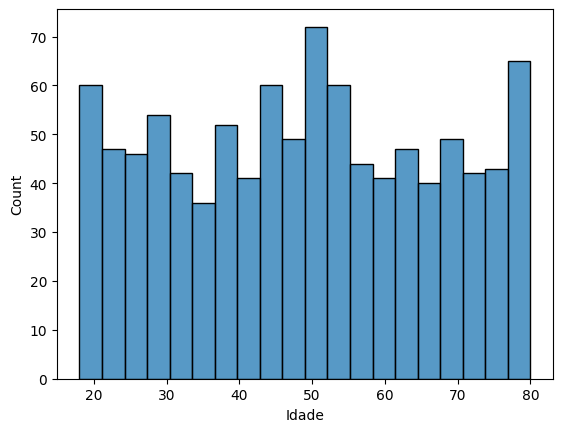

In [579]:
sns.histplot(patients["Idade"], bins=20)

### 3 - Gere um gráfico de correlação entre as variáveis dos datasets

<Axes: >

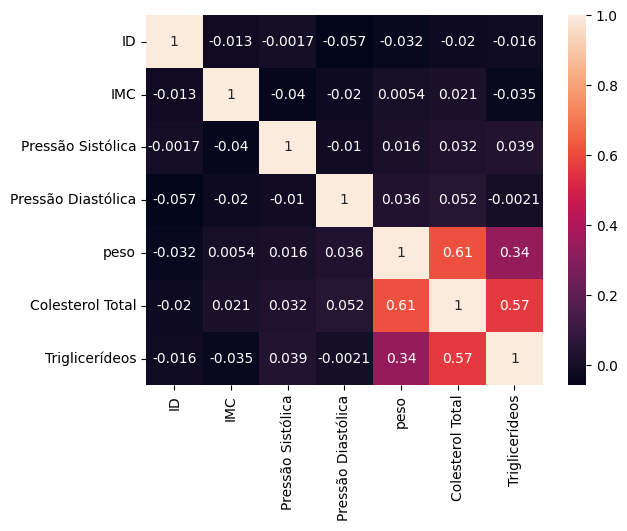

In [580]:
sns.heatmap(medical_data.corr(numeric_only=True), annot=True)

### 4 - Crie o gráfico de WCSS e, após análise dos dados no gráfico, responda: Qual é o valor de WCSS para cluster de número 3?

In [581]:
wcss[2]

836791.7296360913

### 5 - Crie uma representação gráfica baseada nas features utilizadas na clusterização.

In [582]:
final_grapic = go.Figure(data=distribution_grapic.data + centroids_grapic.data)
final_grapic.update_xaxes(title="Peso (Pounds)")
final_grapic.update_yaxes(title="Triglicerídeos")
final_grapic.update_layout(title="Risk of developing cardiovascular problems", title_x=.5)
final_grapic.show()

### 6 - Após aplicar o algoritmo de agrupamento, gere uma estatística com a função describe da variável colesterol total, agrupando os resultados por cluster

In [583]:
patients.groupby(["risk_name"]).describe()["Colesterol Total"]

,count,mean,std,min,25%,50%,75%,max
risk_name,,,,,,,,
High,503.0,195.298688,23.792867,113.2,179.500,196.10,211.4,265.6
Intermediary,267.0,166.534757,27.821443,96.4,146.400,165.40,185.7,237.1
Very High,220.0,220.956818,26.812982,151.6,204.075,219.55,240.1,293.2


### - 7 Generate a boxplot diagram between the variables amount of triglycerides and cluster.

<Axes: xlabel='Triglicerídeos', ylabel='risk_name'>

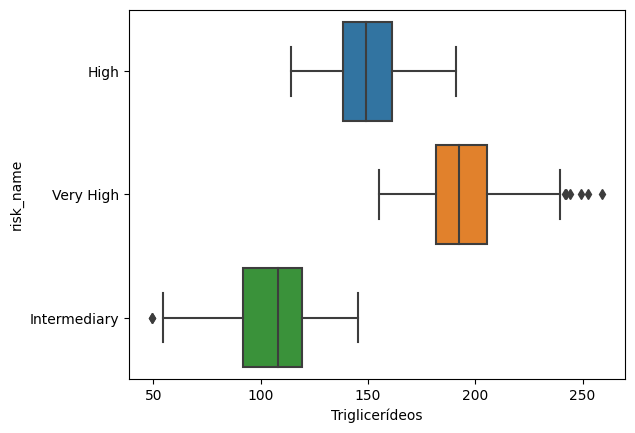

In [584]:
sns.boxplot(data=patients, x="Triglicerídeos", y="risk_name")

### 8 - How many women are in the very high risk cluster?

In [585]:
patients.groupby(["risk_name", "Gênero"])["Gênero"].describe()

count unique top freq
risk_name    Gênero                      
High         F        260      1   F  260
             M        243      1   M  243
Intermediary F        126      1   F  126
             M        141      1   M  141
Very High    F        118      1   F  118
             M        102      1   M  102

### 9 - Which state has the highest number of people in the high risk group?

In [586]:
patients.groupby(["risk_name", "nome"])["nome"].describe().loc["High"].sort_values("count", ascending=False)

,count,unique,top,freq
nome,,,,
Paraíba,28,1,Paraíba,28
Minas Gerais,25,1,Minas Gerais,25
Mato Grosso,24,1,Mato Grosso,24
Acre,22,1,Acre,22
Roraima,22,1,Roraima,22
Rio Grande do Sul,22,1,Rio Grande do Sul,22
Sergipe,21,1,Sergipe,21
Alagoas,21,1,Alagoas,21
Paraná,21,1,Paraná,21


### 10 - Which group has the greatest number of people in whom alcohol consumption is low?

In [587]:
alcohol = patients.groupby(["risk_name", "Consumo de Álcool"])["Consumo de Álcool"].describe().sort_values("count", ascending=False)
alcohol

,,count,unique,top,freq
risk_name,Consumo de Álcool,,,,
High,Baixo,306,1,Baixo,306
Intermediary,Baixo,152,1,Baixo,152
High,Moderado,150,1,Moderado,150
Very High,Baixo,132,1,Baixo,132
Intermediary,Moderado,89,1,Moderado,89
Very High,Moderado,58,1,Moderado,58
High,Alto,47,1,Alto,47
Very High,Alto,30,1,Alto,30
Intermediary,Alto,26,1,Alto,26


### 11 - Which region has the highest value for the variable triglycerides?

In [588]:
patients.sort_values("Triglicerídeos", ascending=False)[["Triglicerídeos", "regiao"]]

,Triglicerídeos,regiao
185,259.3,Nordeste
88,252.6,Nordeste
244,249.3,Centro-Oeste
47,244.1,Sudeste
850,242.1,Sul
...,...,...
407,54.6,Centro-Oeste
630,54.5,Centro-Oeste
870,54.4,Sul
385,49.5,Centro-Oeste


### 12 - What is the average weight of males in the intermediate-risk group?

In [589]:
patients[patients["risk_name"] == "Intermediary"].groupby(["risk_name", "Gênero"])["peso"].describe()

count        mean        std   min     25%    50%  \
risk_name    Gênero                                                      
Intermediary F       126.0  130.569048  24.639748  68.7  113.85  133.1   
             M       141.0  134.677305  23.735264  67.5  120.30  135.6   

                         75%    max  
risk_name    Gênero                  
Intermediary F       146.475  178.7  
             M       150.500  199.2

### 13 - Construct a histogram of the weight distribution of patients in the high-risk group. Generate a chart with 30 bars.

<Axes: xlabel='peso', ylabel='Count'>

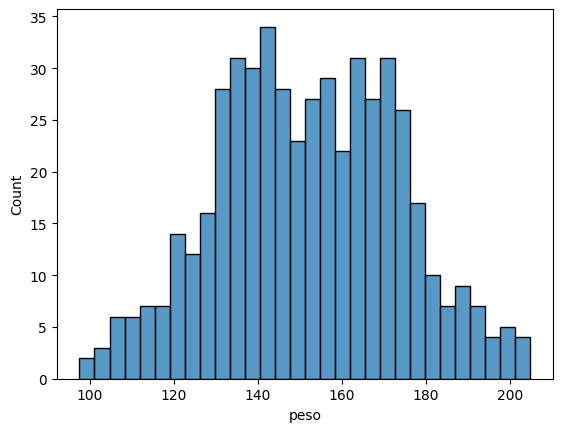

In [590]:
sns.histplot(data=patients.loc[patients["risk_name"] == "High", "peso"], bins=30)

### 14 - Which state has the largest number of people who have normal sugar levels?

In [591]:
patients[patients["Nível de Açúcar"] == "Normal"].groupby("nome")["nome"].describe().sort_values("count", ascending=False)

,count,unique,top,freq
nome,,,,
Amazonas,36,1,Amazonas,36
Minas Gerais,36,1,Minas Gerais,36
Paraná,35,1,Paraná,35
Paraíba,35,1,Paraíba,35
Sergipe,35,1,Sergipe,35
Roraima,33,1,Roraima,33
Goiás,33,1,Goiás,33
Maranhão,33,1,Maranhão,33
Alagoas,33,1,Alagoas,33


### 15 - Which region has the highest mean systolic pressure for the high-risk group?

In [592]:
patients[patients["risk_name"] == "High"].groupby('regiao')['Pressão Sistólica'].describe().sort_values("mean", ascending=False)

,count,mean,std,min,25%,50%,75%,max
regiao,,,,,,,,
Sul,59.0,133.627119,25.192978,91.0,110.5,135.0,157.0,170.0
Nordeste,173.0,130.543353,22.311865,90.0,114.0,130.0,147.0,170.0
Norte,119.0,129.806723,24.697244,90.0,108.0,132.0,151.5,169.0
Centro-Oeste,77.0,128.753247,22.210806,92.0,110.0,126.0,147.0,168.0
Sudeste,75.0,127.040000,23.048973,90.0,108.5,124.0,148.0,170.0
